In [2]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
from skimage.graph import route_through_array

import matplotlib.pyplot as plt

In [3]:
def load_data(datafile):
    arr = []
    with open(datafile, 'r') as fp:
        for l in fp.readlines():
            row = [int(c) for c in l.strip()]
            arr.append(row)
    return arr

In [47]:
arr = np.array(load_data("input.txt"))

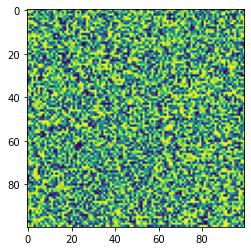

In [5]:
plt.imshow(arr)

In [44]:
def find_route(arr):
    indices, weight = route_through_array(arr, (0, 0), (arr.shape[0]-1, arr.shape[1]-1), fully_connected=False)
    indices = np.array(indices).T
    path = np.zeros_like(arr)
    path[indices[0], indices[1]] = 1
    path[0, 0] = 0
    return int(np.sum(arr[path == 1]))

In [36]:
def make_tile(arr, step=1):
    tile = arr.copy()
    tile = tile + step
    tile[tile > 9] -= 9
    return tile

In [45]:
testarr = np.array(load_data("test.txt"))
find_route(testarr)

40

In [38]:
make_tile(testarr, step=0)

array([[1, 1, 6, 3, 7, 5, 1, 7, 4, 2],
       [1, 3, 8, 1, 3, 7, 3, 6, 7, 2],
       [2, 1, 3, 6, 5, 1, 1, 3, 2, 8],
       [3, 6, 9, 4, 9, 3, 1, 5, 6, 9],
       [7, 4, 6, 3, 4, 1, 7, 1, 1, 1],
       [1, 3, 1, 9, 1, 2, 8, 1, 3, 7],
       [1, 3, 5, 9, 9, 1, 2, 4, 2, 1],
       [3, 1, 2, 5, 4, 2, 1, 6, 3, 9],
       [1, 2, 9, 3, 1, 3, 8, 5, 2, 1],
       [2, 3, 1, 1, 9, 4, 4, 5, 8, 1]])

In [39]:
def make_tiled_array(a):
    ax, ay = a.shape
    size = 5 * ax
    new = np.zeros(size * size).reshape(size, size)
    for i in range(5):
        for j in range(5):
            step = i + j
            yslice = slice(i*ay, i*ay + ay)
            xslice = slice(j*ax, j*ax + ax)
            new[yslice, xslice] += make_tile(a, step=step)
    return new

In [46]:
test_tiled = make_tiled_array(testarr)
find_route(test_tiled)

315

In [48]:
full_tiled = make_tiled_array(arr)
find_route(full_tiled)

2966

In [49]:
%timeit find_route(full_tiled)

64.2 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
